In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
import itertools
import warnings
warnings.filterwarnings('ignore')

# Read the training data
train = pd.read_csv("input/mnist_train.csv")
print("Shape of training data : ",train.shape)

# Read the testing data
test = pd.read_csv("input/mnist_test.csv")
print("Shape of testing data : ",test.shape)

# Extract training features and labels
X_train = train.drop(labels = ["label"],axis = 1)
Y_train = train["label"]

# Extract testing features and labels
X_test = test.drop(labels = ["label"],axis = 1)
Y_test = test["label"]

# Convert to numpy arrays
X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Reshaped training data: ",X_train.shape)
print("Reshaped testing data: ",X_test.shape)

# Encode the labels
Y_train = to_categorical(Y_train, num_classes = 10)
 
# Create model
model = Sequential()

# Convolution layer 1 and Pooling layer 1
model.add(Conv2D(filters = 16, 
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu', 
                 input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer 2 and Pooling layer 2
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Fully connected layer 
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Model summary
print("Model architecture : ")
model.summary()

# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , 
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Fit the datagen to X_train
datagen.fit(X_train)

epochs = 10
print("Number of epochs : ",epochs)
batch_size = 250
print("Batch size : ",batch_size)

# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (X_val,Y_val), 
                              steps_per_epoch = X_train.shape[0] // batch_size)

Shape of training data :  (60000, 785)
Shape of testing data :  (10000, 785)
Reshaped training data:  (60000, 28, 28, 1)
Reshaped testing data:  (10000, 28, 28, 1)
Model architecture : 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)              0         
_________________________________________________________________


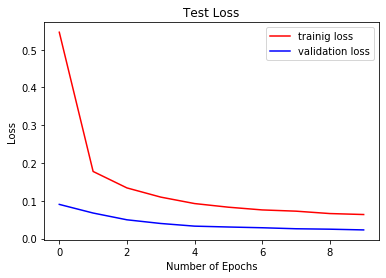

In [88]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color='r', label="trainig loss")
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

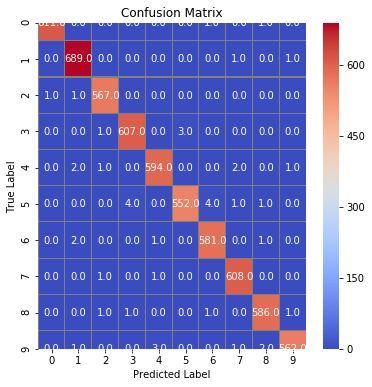

In [93]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="coolwarm",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Data visualisation
#plt.figure(figsize=(15,7))
#g = sns.countplot(Y_train, palette="icefire")
#plt.title("Number of digit classes")
#Y_train.value_counts()